In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
condition = df['value'] >= df['value'].quantile(0.025)
condition2 = df['value'] <= df['value'].quantile(0.975)
df_clean = df[condition & condition2]
#df_clean = df_clean[df_clean['value'] > df_clean['value'].quantile(0.975)]
df_clean
#df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0, 0.5, 'Page Views')

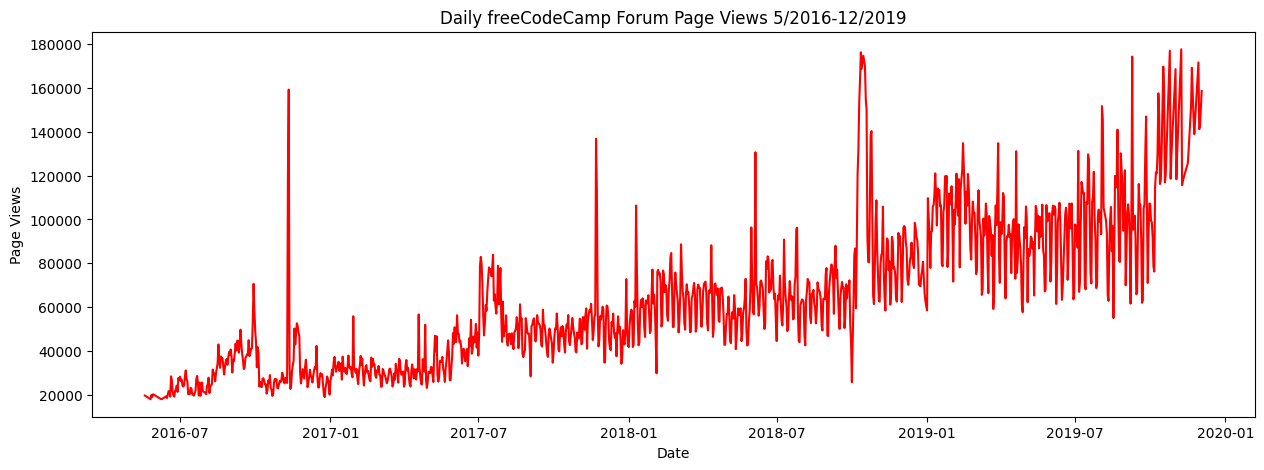

In [5]:
fig, ax = plt.subplots(figsize=(15,5))  # a figure with a single Axes
fig =plt.plot(df_clean.index, df_clean['value'], color='red')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')


In [6]:
df_bar = df_clean.copy()
df_bar['month'] = df_bar.index.month
df_bar['year'] = df_bar.index.year
df_bar =df_bar.groupby([df_bar["year"],df_bar["month"]]).mean()

#df_bar=df_bar.groupby([df_bar.index.year,df_bar.index.month]).agg({'value':'sum'})
#df_bar.index.year
df_bar.head(3)

value
year month              
2016 5      19432.400000
     6      21875.105263
     7      24109.678571

Text(0, 0.5, 'Average Page Views')

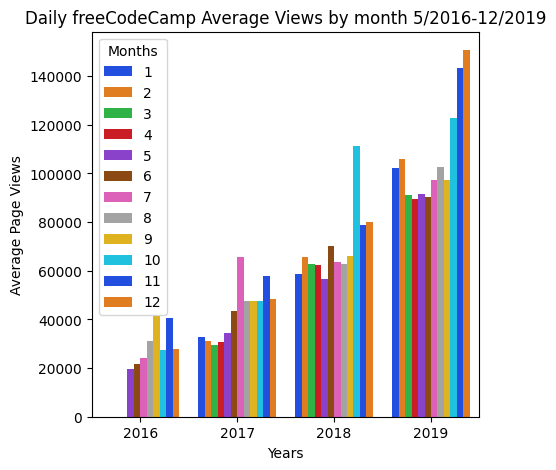

In [7]:
fig, ax = plt.subplots(figsize=(5,5))  # a figure with a single Axes
fig=sns.barplot(x="year",y="value",hue="month",data=df_bar, legend='full', palette='bright')
fig=plt.legend(title='Months')
fig=fig.figure
ax.set_title('Daily freeCodeCamp Average Views by month 5/2016-12/2019')
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')

In [8]:
# Prepare data for box plots (this part is done!)
df_box = df_clean.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head(3)

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May


Text(0, 0.5, 'Page Views')

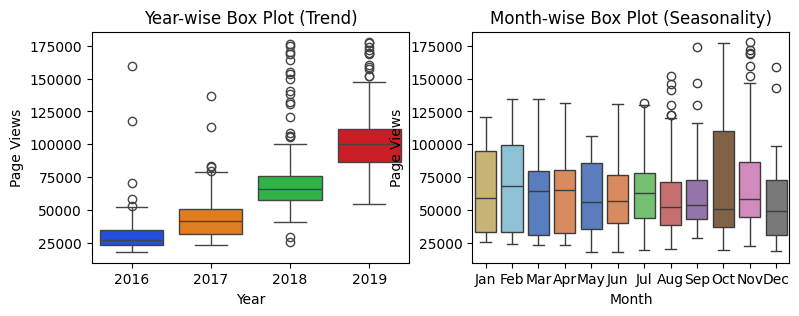

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(9,3))  # a figure with a single Axes
axs[0].set_title('Year-wise Box Plot (Trend)')
axs[1].set_title('Month-wise Box Plot (Seasonality)')
fig = sns.boxplot(x=df_box['year'], hue=df_box['year'],legend=False, y=df_box['value'], ax=axs[0],palette='bright',)
fig = sns.boxplot(x=df_box['month'], hue=df_box['month'], legend=False, y=df_box['value'], ax=axs[1], palette='muted',order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Page Views')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Page Views')

